In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
target = df["Survived"]
print(target)
inputs = df.drop(["PassengerId","Survived","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis="columns")
inputs


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [4]:
import math

median_age = math.floor(inputs["Age"].median())
inputs["Age"] = inputs["Age"].fillna(median_age)
inputs


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
inputs["Sex"] = label_encoder.fit_transform(inputs["Sex"])
inputs



In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs, target)



DecisionTreeClassifier()

In [12]:
score = model.score(inputs, target)
print("The score of the model is: ", score)


The score of the model is:  0.9775533108866442


In [11]:
model.predict([[3, 0, 1, 7.25]])

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
report = classification_report(target, model.predict(inputs))
print("The Classification Report: \n",report)

The Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.95      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.97      0.98       891
weighted avg       0.98      0.98      0.98       891



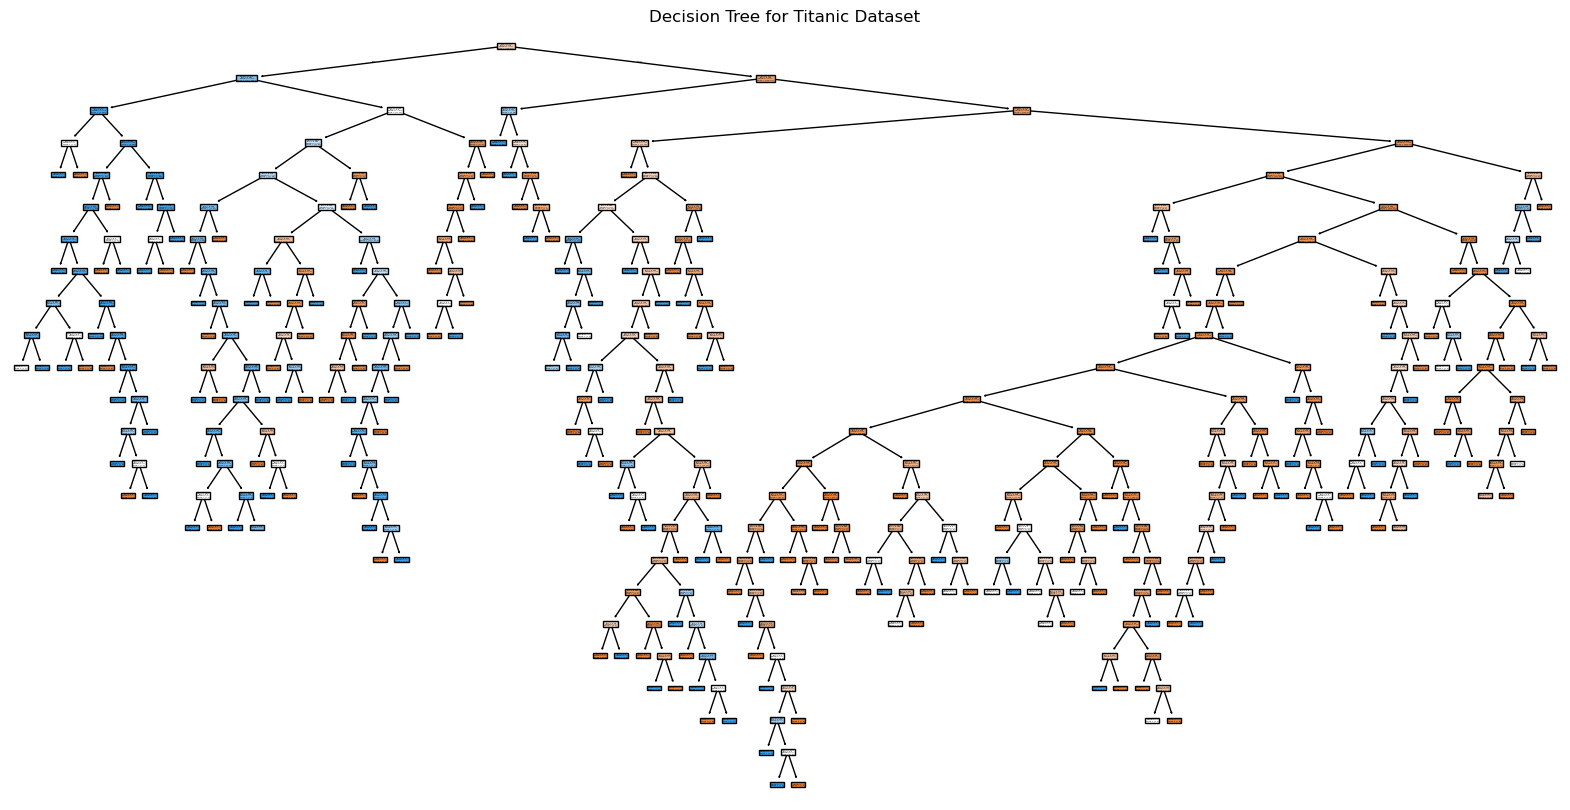

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=inputs.columns)
plt.title("Decision Tree for Titanic Dataset")
plt.show()
